In [0]:
import pandas as pd
import numpy as np
import io
from google.colab import files

In [2]:
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
#io 사용해서 uploaded에 들어가 있는걸 pandas dataframe로 넣어주는 행

In [4]:
uploaded = files.upload()

Saving test.csv to test.csv


In [0]:
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
#io 사용해서 uploaded에 들어가 있는걸 pandas dataframe로 넣어주는 행

In [6]:
print('train data shape: ', train.shape)
print('test data shape: ', test.shape)
print('--------------[train information]---------------')
print(train.info())
print('--------------[test information]---------------')
print(test.info())

train data shape:  (891, 12)
test data shape:  (418, 11)
--------------[train information]---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
--------------[test information]---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age          

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [13]:
feature_ratio = train['Sex'].value_counts(sort=False)
print(feature_ratio)
print(feature_ratio.index)
print(feature_ratio.unique)
print(feature_ratio.size)
survived = train[train['Survived']==1]['Sex'].value_counts()
type(survived)

male      577
female    314
Name: Sex, dtype: int64
Index(['male', 'female'], dtype='object')
<bound method Series.unique of male      577
female    314
Name: Sex, dtype: int64>
2


pandas.core.series.Series

In [0]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    # True면 개수 기준 정렬, False면 유일한 값 기준 정렬
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = train[train['Survived'] == 1][feature].value_counts()
    #train['Survived'] == 1 -> 불리언으로 나옴. 즉 Survived = 1인 행들만 뽑고
    #'Sex'로 구분해서 .value_counts()로 value 별 값 뽑음
    dead = train[train['Survived'] == 0][feature].value_counts()
    #Survived 구하는거랑 동일함
    
    plt.plot(aspect='auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature + '\'s ratio in total')
    plt.show() #그래프 그림
    
    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i+1, aspect='equal')
        plt.pie([survived[index], dead[index]], labels=['Survived', 'Dead'], autopct='%1.1f%%')
        plt.title(str(index)+'\'s ratio')
    
    plt.show()

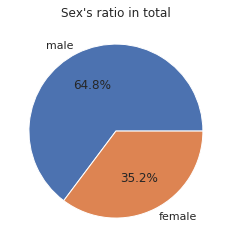

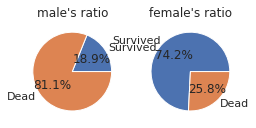

In [10]:
pie_chart('Sex')

In [0]:
pie_chart('Pclass')

In [0]:
pie_chart('Embarked')

In [0]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead]) #원래 얘네는 pandas.core.series.Series 타입인데 df로 변환
    df.index = ['Survived','Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

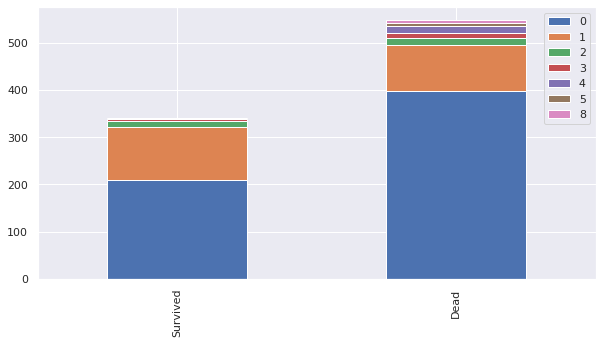

In [15]:
bar_chart('SibSp')

In [0]:
bar_chart('Parch')

In [0]:
train_and_test = [train, test]

In [0]:
for dataset in train_and_test:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.')
    #title에 name에 붙어있는 .으로 끝나는 앞에꺼 뽑아서 넣음.

In [18]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
#잡스러운 title을 other이나 다른걸로 replace하는 과정
for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].replace(['Capt','Col','Countess','Don','Dona','Dr','Jonkheer','Lady','Major','Rev','Sir'],'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', "Miss")
    dataset['Title'] = dataset['Title'].replace('Mme', "Mrs")
    dataset['Title'] = dataset['Title'].replace('Ms', "Miss")
    
train[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [0]:
for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].astype(str)

In [0]:
for dataset in train_and_test:
    dataset['Sex'] = dataset['Sex'].astype(str)

In [23]:
train.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [0]:
for dataset in train_and_test:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].astype(str)

In [25]:
for dataset in train_and_test:
    dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
    dataset['Age'] = dataset['Age'].astype(int)
    train['AgeBand'] = pd.cut(train['Age'],5)
print(train[['AgeBand','Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.344762
2   (32.0, 48.0]  0.403226
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [0]:
print(train['AgeBand'])

0      (16.0, 32.0]
1      (32.0, 48.0]
2      (16.0, 32.0]
3      (32.0, 48.0]
4      (32.0, 48.0]
           ...     
886    (16.0, 32.0]
887    (16.0, 32.0]
888    (16.0, 32.0]
889    (16.0, 32.0]
890    (16.0, 32.0]
Name: AgeBand, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] <
                                    (64.0, 80.0]]


In [27]:
dataset['Age'] <= 16

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Age, Length: 418, dtype: bool

In [0]:
for dataset in train_and_test:
  #loc는 인덱스 기준 행 읽기, iloc는 행번호 기준 행 읽기
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    dataset['Age'] = dataset['Age'].map( { 0: 'Child',  1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'} ).astype(str)

In [29]:
dataset['Age']

0      Middle
1      Middle
2       Prime
3       Young
4       Young
        ...  
413     Young
414    Middle
415    Middle
416     Young
417     Young
Name: Age, Length: 418, dtype: object

In [30]:
print(train[['Pclass','Fare']].groupby(['Pclass'], as_index=False).mean())
print("")
print(test[test['Fare'].isnull()]['Pclass'])

   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550

152    3
Name: Pclass, dtype: int64


In [0]:
for dataset in train_and_test:
    dataset['Fare']=dataset['Fare'].fillna(13.675)

In [33]:
type(train['Fare'][5])

numpy.float64

In [0]:
for dataset in train_and_test:
    dataset.loc[ dataset['Fare'] <= 7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 10.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 21.679), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare']   = 3
    dataset.loc[ dataset['Fare'] > 39.688, 'Fare'] = 4
    dataset['Fare'] = dataset['Fare'].astype(int)

In [45]:
print(train['Fare'])

0      0
1      4
2      1
3      4
4      1
      ..
886    2
887    3
888    3
889    3
890    0
Name: Fare, Length: 891, dtype: int64


<h1>4-6. SibSp & Parch Feature (Family)



In [0]:
for dataset in train_and_test:
    dataset['Family'] = dataset['Parch'] + dataset['SibSp']
    dataset['Family'] = dataset['Family'].astype(int)

In [48]:
feature_drop = ['Name','Ticket','Cabin','SibSp','Parch']
train = train.drop(feature_drop, axis=1)
test = test.drop(feature_drop, axis=1)
train = train.drop(['PassengerId','AgeBand','FareBand'],axis=1)

print(train.head())
print(test.head())

   Survived  Pclass     Sex     Age  Fare Embarked Title  Family
0         0       3    male   Young     0        S    Mr       1
1         1       1  female  Middle     4        C   Mrs       1
2         1       3  female   Young     1        S  Miss       0
3         1       1  female  Middle     4        S   Mrs       1
4         0       3    male  Middle     1        S    Mr       0
   PassengerId  Pclass     Sex     Age  Fare Embarked Title  Family
0          892       3    male  Middle     0        Q    Mr       0
1          893       3  female  Middle     0        S   Mrs       1
2          894       2    male   Prime     1        Q    Mr       0
3          895       3    male   Young     1        S    Mr       0
4          896       3  female   Young     2        S   Mrs       2


In [0]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

train_label = train['Survived']
train_data = train.drop('Survived', axis = 1)
test_data = test.drop("PassengerId", axis = 1).copy()

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

In [0]:
train_data, train_label = shuffle(train_data, train_label, random_state = 5)

In [0]:
def train_and_test(model):
  model.fit(train_data, train_label)
  prediction = model.predict(test_data)
  accuracy = round(model.score(train_data, train_label)*100, 2)
  print("Accuracy : ", accuracy, "%")
  return prediction

In [55]:
log_pred = train_and_test(LogisticRegression())
svm_pred = train_and_test(SVC())
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors = 4))
rf_pred = train_and_test(RandomForestClassifier(n_estimators = 100))
nb_pred = train_and_test(GaussianNB())

Accuracy :  82.72 %
Accuracy :  83.5 %
Accuracy :  85.41 %
Accuracy :  88.55 %
Accuracy :  79.8 %


In [0]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": rf_pred
})

submission.to_csv('submission_rf.csv', index=False)

In [59]:
!pip3 install kaggle

In [61]:
!kaggle competitions submit titanic -f submission_rf.csv -m "First submission"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [62]:
!git remote add origin https://github.com/hee-c/Kaggle_titanic.git
!git push -u origin master

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [63]:
!git init

Initialized empty Git repository in /content/.git/


In [64]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.config/
	sample_data/
	submission_rf.csv
	test.csv
	train.csv

nothing added to commit but untracked files present (use "git add" to track)


In [0]:
!git add .

In [68]:
!git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)

	new file:   .config/.last_survey_prompt.yaml
	new file:   .config/.last_update_check.json
	new file:   .config/.metricsUUID
	new file:   .config/active_config
	new file:   .config/config_sentinel
	new file:   .config/configurations/config_default
	new file:   .config/gce
	new file:   .config/logs/2019.12.18/16.52.05.166856.log
	new file:   .config/logs/2019.12.18/16.52.20.616768.log
	new file:   .config/logs/2019.12.18/16.52.31.147337.log
	new file:   .config/logs/2019.12.18/16.52.34.414154.log
	new file:   .config/logs/2019.12.18/16.52.35.435000.log
	new file:   sample_data/README.md
	new file:   sample_data/anscombe.json
	new file:   sample_data/california_housing_test.csv
	new file:   sample_data/california_housing_train.csv
	new file:   sample_data/mnist_test.csv
	new file:   sample_data/mnist_train_small.csv
	new file:   submission_rf.csv
	new file:   test.csv
	new file:   t